In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Q1 - Prepare the downloaded iris dataset for splitting

In [4]:
data = pd.read_table("iris.data", sep = ",", names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])

In [5]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X = data.iloc[:, :-1].values 
Y = data.iloc[:, 4].values 
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

In [9]:
#Q2 - Creating a Gaussian Naïve Bayes model

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [12]:
#Q3 - Accuracy of the trained model

In [13]:
gnb.score(X_test, Y_test)

0.9111111111111111

In [14]:
#Q3 - Other metrics of evaluating a model

In [15]:
from sklearn import metrics

In [16]:
Y_pred = gnb.predict(X_train)
print(metrics.classification_report(Y_train, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.94      1.00      0.97        32
 Iris-virginica       1.00      0.95      0.97        38

    avg / total       0.98      0.98      0.98       105



In [17]:
#Q4 - Confusion matrix

In [18]:
print(metrics.confusion_matrix(Y_train, Y_pred))

[[35  0  0]
 [ 0 32  0]
 [ 0  2 36]]


In [19]:
#In thi scase the diagonal elements represent the number of points for which the predicted label is equal to the true label
#Values that are off-diagonal elements are those that are mislabeled by the classifier. 
#The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [20]:
sb_data = pd.DataFrame(metrics.confusion_matrix(Y_train, Y_pred), index = ['Setosa', 'Versicolor', 'Virginica'], columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

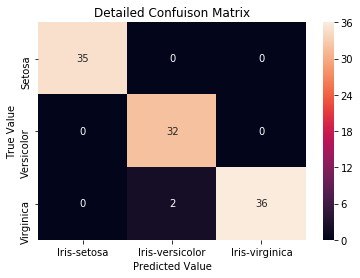

In [21]:
plt.figure(figsize = (6,4))
sb.heatmap(sb_data, annot = True)
plt.title("Detailed Confuison Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [22]:
#Q5 - Naive Bayes assumptions 
#-Continuous data is distributed over a Gaussian distribution
#-Properties of data or the data itself is independent and is of equal importance

In [23]:
#Q6 - Gaussian, Multinomial, Binomial
#Gaussian - continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution i.e.
# data which plotted on a graph forms a bell curve
#Multinomial - used for data which can easily be turned into counts, such as word counts in text.
#Binomial - features are independent booleans (binary variables) describing inputs